In [13]:
#importing all the libraries we need
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
#Adding in our datafile
survival_df = pd.read_csv("../Resources/cleaned_data_survival_prediction.csv")
survival_df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,0.004861,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,admit,CTICU,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [15]:
#labeling our X variable to drop our target variable
#setting our y variable to be our target variable
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [16]:
#dummy-coding the rest of our X categorical variables
X = pd.get_dummies(X)

### Balance the data set - OVERsampling

#### Since our data was not evenly distributed, we decided to use a method called OVERsampling to help compensate.

In [17]:
#Balance Data - oversampling
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [18]:
from sklearn.preprocessing import StandardScaler
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=45)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [19]:
#Running Linear Regression
lrm = LinearRegression()

lrm.fit(X_train_scaled, y_train)
training_score = lrm.score(X_train_scaled, y_train)
testing_score = lrm.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.39115022447234216
Testing Score: 0.3893844626210845


In [20]:
#Testing our model
y_true = y_test
y_pred = lrm.predict(X_test_scaled)

print('Test Acc: %.3f' % lrm.score(X_test_scaled, y_test))



Test Acc: 0.389


ValueError: x and y must be the same size

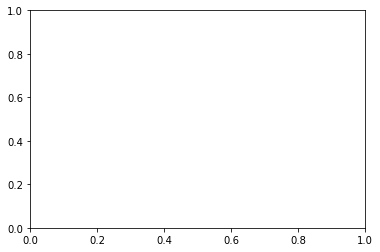